In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pathakvishal","key":"faad35cd17bc32a4e2f46eb3f7b00abf"}'}

In [0]:
import os
os.chdir('/content/gdrive/My Drive/kaggle/StackOverflow')

In [0]:
!pwd

/content/gdrive/My Drive/kaggle/StackOverflow


In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
# we need to set permissions 
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [0]:
!kaggle datasets download -d stackoverflow/stacksample

 99% 1.10G/1.11G [00:22<00:00, 52.4MB/s]
100% 1.11G/1.11G [00:22<00:00, 53.4MB/s]


In [1]:
# Run in terminal or command prompt
# python3 -m spacy download en
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
# Plotting tools


unable to import 'smart_open.gcs', disabling that module


In [0]:
! unzip /content/gdrive/My Drive/kaggle/StackOverflow


unzip:  cannot find or open /content/gdrive/My, /content/gdrive/My.zip or /content/gdrive/My.ZIP.


In [0]:
!unzip stacksample.zip

Archive:  stacksample.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [2]:
df_question = pd.read_csv(u'stacksample/Questions.csv',encoding='ISO-8859-1')

In [3]:
df_question.head(2)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


In [4]:
df_train =  df_question[df_question['Score'] > 5]

In [5]:
df_train.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [6]:
df_train.shape

(72950, 7)

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words.extend(['may','order','lot','go','like','great','service','came','got','use' , 'work' ,'would' , 'code' ,'want' , 'try' , 'way' , 'make' ,'find' , 'know' , 'make' , 'look' ,'get' ,'change' , 'see' , 'set', 'need' , 'example' ,'also' , 'however', 'run' , 'use' , 'try', 'use' ])

In [9]:
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

In [10]:
df_train['body_cleaned'] = df_train['Body'].apply(normalize_text)

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
print(df_train.iloc[1]['body_cleaned'])

Are there any really good tutorials explaining branching and merging with Apache Subversion? All the better if it's specific to TortoiseSVN client.


In [12]:
nlp = spacy.load("en_core_web_sm")

In [13]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords.words('english') and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)


df_train['body_cleaned'] = df_train['body_cleaned'].apply(lambda x: cleanup_text(x, False))

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [14]:
print(df_train.iloc[0]['body_cleaned'])

write database generation script sql want execute adobe air application execute adobe air use follow method error generate however trole exist . seem look first query semicolon- remove query fail . way call multiple query one statement


In [15]:
df_train2 = df_train

In [16]:
df_train.drop(['Id','OwnerUserId' ,'ClosedDate' ,'CreationDate' , 'Title' ,'Body' ,] , axis=1 , inplace=True)

c:\py3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
# df_train.drop(['ClosedDate' ,] , axis=1 , inplace=True)

In [18]:
df_train.head()

,Score,body_cleaned
0,26,write database generation script sql want exec...
1,144,really good tutorial explain branching merge a...
2,21,anyone get experience create sql base asp.net ...
3,53,something pseudo solve many time never quite f...
4,49,little game write c . use database back end . ...


In [19]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [20]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df_train['body_cleaned']))

print(data_words[:5])

[['write', 'database', 'generation', 'script', 'sql', 'want', 'execute', 'adobe', 'air', 'application', 'execute', 'adobe', 'air', 'use', 'follow', 'method', 'error', 'generate', 'however', 'trole', 'exist', 'seem', 'look', 'first', 'query', 'semicolon', 'remove', 'query', 'fail', 'way', 'call', 'multiple', 'query', 'one', 'statement'], ['really', 'good', 'tutorial', 'explain', 'branching', 'merge', 'apache', 'subversion', 'well', 'specific', 'tortoisesvn', 'client'], ['anyone', 'get', 'experience', 'create', 'sql', 'base', 'asp', 'net', 'site', 'map', 'providers', 've', 'get', 'default', 'xml', 'file', 'web', 'sitemap', 'work', 'properly', 'menu', 'sitemappath', 'control', 'need', 'way', 'user', 'site', 'create', 'modify', 'page', 'dynamically', 'need', 'tie', 'page', 'view', 'permission', 'standard', 'asp', 'net', 'membership', 'system', 'well'], ['something', 'pseudo', 'solve', 'many', 'time', 'never', 'quite', 'find', 'solution', 'stuck', 'problem', 'come', 'way', 'generate', 'colo

In [21]:
print(data_words[:35])

[['write', 'database', 'generation', 'script', 'sql', 'want', 'execute', 'adobe', 'air', 'application', 'execute', 'adobe', 'air', 'use', 'follow', 'method', 'error', 'generate', 'however', 'trole', 'exist', 'seem', 'look', 'first', 'query', 'semicolon', 'remove', 'query', 'fail', 'way', 'call', 'multiple', 'query', 'one', 'statement'], ['really', 'good', 'tutorial', 'explain', 'branching', 'merge', 'apache', 'subversion', 'well', 'specific', 'tortoisesvn', 'client'], ['anyone', 'get', 'experience', 'create', 'sql', 'base', 'asp', 'net', 'site', 'map', 'providers', 've', 'get', 'default', 'xml', 'file', 'web', 'sitemap', 'work', 'properly', 'menu', 'sitemappath', 'control', 'need', 'way', 'user', 'site', 'create', 'modify', 'page', 'dynamically', 'need', 'tie', 'page', 'view', 'permission', 'standard', 'asp', 'net', 'membership', 'system', 'well'], ['something', 'pseudo', 'solve', 'many', 'time', 'never', 'quite', 'find', 'solution', 'stuck', 'problem', 'come', 'way', 'generate', 'colo

In [22]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['write', 'database', 'generation', 'script', 'sql', 'want', 'execute', 'adobe_air', 'application', 'execute', 'adobe_air', 'use', 'follow', 'method', 'error', 'generate', 'however', 'trole', 'exist', 'seem', 'look', 'first', 'query', 'semicolon', 'remove', 'query', 'fail', 'way', 'call', 'multiple', 'query', 'one', 'statement']


In [23]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [24]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['write', 'database', 'application', 'error', 'generate', 'exist', 'seem', 'first', 'semicolon', 'remove', 'query', 'fail', 'call', 'multiple', 'query', 'statement']]


In [25]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [26]:
id2word[0]

'application'

In [27]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('application', 1),
  ('call', 1),
  ('database', 1),
  ('error', 1),
  ('exist', 1),
  ('fail', 1),
  ('first', 1),
  ('generate', 1),
  ('multiple', 1),
  ('query', 2),
  ('remove', 1),
  ('seem', 1),
  ('semicolon', 1),
  ('statement', 1),
  ('write', 1)]]

In [28]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=200, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [29]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(91,
  '0.000*"stdsoap" + 0.000*"gsoap" + 0.000*"gfb" + 0.000*"listaddress" + '
  '0.000*"minorityuse" + 0.000*"culprint" + 0.000*"inamesource" + '
  '0.000*"mysort" + 0.000*"pulldown" + 0.000*"speakerthis"'),
 (27,
  '0.000*"stdsoap" + 0.000*"gsoap" + 0.000*"gfb" + 0.000*"listaddress" + '
  '0.000*"minorityuse" + 0.000*"culprint" + 0.000*"inamesource" + '
  '0.000*"mysort" + 0.000*"pulldown" + 0.000*"speakerthis"'),
 (24,
  '0.000*"stdsoap" + 0.000*"gsoap" + 0.000*"gfb" + 0.000*"listaddress" + '
  '0.000*"minorityuse" + 0.000*"culprint" + 0.000*"inamesource" + '
  '0.000*"mysort" + 0.000*"pulldown" + 0.000*"speakerthis"'),
 (54,
  '0.000*"stdsoap" + 0.000*"gsoap" + 0.000*"gfb" + 0.000*"listaddress" + '
  '0.000*"minorityuse" + 0.000*"culprint" + 0.000*"inamesource" + '
  '0.000*"mysort" + 0.000*"pulldown" + 0.000*"speakerthis"'),
 (35,
  '0.000*"stdsoap" + 0.000*"gsoap" + 0.000*"gfb" + 0.000*"listaddress" + '
  '0.000*"minorityuse" + 0.000*"culprint" + 0.000*"inamesource" + '
  '0.00

In [30]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -76.91732335022665

Coherence Score:  0.33303357733789357


In [31]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster      Freq
topic                                                                   
99     0.278259+0.000000j -0.156147+0.000000j       1        1  2.331537
19     0.275186+0.000000j -0.108040+0.000000j       2        1  2.144704
162    0.273856+0.000000j -0.098242+0.000000j       3        1  2.088289
31     0.273210+0.000000j -0.092086+0.000000j       4        1  2.036988
165    0.275161+0.000000j -0.113118+0.000000j       5        1  2.002315
...                   ...                 ...     ...      ...       ...
118   -0.190566+0.000000j -0.001480+0.000000j     196        1  0.003633
120   -0.190566+0.000000j -0.001480+0.000000j     197        1  0.003633
121   -0.190566+0.000000j -0.001480+0.000000j     198        1  0.003633
122   -0.190566+0.000000j -0.001480+0.000000j     199        1  0.003633
0     -0.190566+0.000000j -0.001480+0.000000j     200        1  0.003633

[200 rows x 5 colum

In [32]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=150, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -57.43582709921061

Coherence Score:  0.35120766770289163


In [35]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster      Freq
topic                                                                   
108    0.223742+0.000000j -0.203099+0.000000j       1        1  2.918367
117    0.217283+0.000000j -0.107459+0.000000j       2        1  2.050057
68     0.212283+0.000000j -0.068888+0.000000j       3        1  2.044847
37     0.220418+0.000000j -0.144457+0.000000j       4        1  2.007020
63     0.214007+0.000000j -0.087158+0.000000j       5        1  1.968388
...                   ...                 ...     ...      ...       ...
81    -0.242090+0.000000j -0.002577+0.000000j     146        1  0.004185
84    -0.242090+0.000000j -0.002577+0.000000j     147        1  0.004185
86    -0.242090+0.000000j -0.002577+0.000000j     148        1  0.004185
87    -0.242090+0.000000j -0.002577+0.000000j     149        1  0.004185
0     -0.242090+0.000000j -0.002577+0.000000j     150        1  0.004185

[150 rows x 5 colum

In [36]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=120, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -47.0720517889115

Coherence Score:  0.35374993255161974


In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster      Freq
topic                                                                   
101   -0.201559+0.000000j -0.286561+0.000000j       1        1  2.885457
78    -0.194059+0.000000j -0.130463+0.000000j       2        1  2.516686
58    -0.191703+0.000000j -0.139550+0.000000j       3        1  2.341335
44    -0.190780+0.000000j -0.083920+0.000000j       4        1  2.225177
12    -0.192523+0.000000j -0.113611+0.000000j       5        1  2.158663
...                   ...                 ...     ...      ...       ...
90     0.264000+0.000000j -0.003328+0.000000j     116        1  0.004672
30     0.264000+0.000000j -0.003328+0.000000j     117        1  0.004672
92     0.264000+0.000000j -0.003328+0.000000j     118        1  0.004672
28     0.264000+0.000000j -0.003328+0.000000j     119        1  0.004672
0      0.264000+0.000000j -0.003328+0.000000j     120        1  0.004672

[120 rows x 5 colum

In [40]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=100, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

KeyboardInterrupt: 

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=80, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=60, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=40, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [41]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [42]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -17.66325325976094

Coherence Score:  0.3656187184104081


In [43]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.218561  0.392037       1        1  12.169149
18     0.198348 -0.257008       2        1  10.613594
16     0.164047 -0.111612       3        1   7.627972
14     0.161949 -0.052041       4        1   7.521692
19     0.085287 -0.010765       5        1   4.405172
29     0.062621 -0.006166       6        1   3.935884
2      0.078319 -0.009398       7        1   3.732553
4      0.022892 -0.000888       8        1   3.294881
17     0.055559 -0.005257       9        1   3.254865
26     0.030779 -0.001894      10        1   2.978527
20     0.016023 -0.000228      11        1   2.965948
24    -0.004192  0.001876      12        1   2.702155
9      0.009934  0.000293      13        1   2.667478
25    -0.009168  0.002093      14        1   2.654914
10     0.003329  0.001090      15        1   2.619869
8     -0.014922  0.002782      16        1   2.566884
3     -0.014003  0.002656      17        1   2.371778
12    -0.035149  0.003998      18        1   2.341225
5     -0.005715  0.001728      19        1   2.330624
28    -0.013652  0.002506      20        1   2.310609
23    -0.055600  0.005345      21        1   2.062963
6     -0.039402  0.004320      22        1   2.048575
0     -0.073129  0.006369      23        1   1.865868
27    -0.069860  0.006112      24        1   1.806959
15    -0.083791  0.006789      25        1   1.679333
1     -0.085913 -0.017058      26        1   1.514113
13    -0.139193  0.008838      27        1   1.348009
22    -0.118474  0.008156      28        1   1.301542
21    -0.113499  0.007978      29        1   1.299348
11    -0.231987  0.007351      30        1   0.007520, topic_info=      Category          Freq          Term         Total  loglift  logprob
29     Default  31723.000000          file  31723.000000   30.000  30.0000
449    Default  25144.000000        follow  25144.000000   29.000  29.0000
70     Default  25510.000000      function  25510.000000   28.000  28.0000
3      Default  23284.000000         error  23284.000000   27.000  27.0000
62     Default  21771.000000         class  21771.000000   26.000  26.0000
...        ...           ...           ...           ...      ...      ...
19747  Topic30      0.003068     journalid      1.125009    3.591 -10.9902
19746  Topic30      0.003068  fetchallnote      1.125009    3.591 -10.9902
19771  Topic30      0.003068     filemerge      1.125009    3.591 -10.9902
19773  Topic30      0.003068           rvm      1.125009    3.591 -10.9902
19744  Topic30      0.003068  thingscreate      1.125009    3.591 -10.9902

[1178 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
188       3  0.999913     able
362      11  0.999873   access
1040      5  0.999116   accord
443       7  0.999133  account
1108      4  0.999458   action
...     ...       ...      ...
757      15  0.999738    would
14        4  0.999921    write
425      24  0.999871    wrong
690      22  0.998786      xml
925       4  0.999286      yet

[672 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 19, 17, 15, 20, 30, 3, 5, 18, 27, 21, 25, 10, 26, 11, 9, 4, 13, 6, 29, 24, 7, 1, 28, 16, 2, 14, 23, 22, 12])

In [44]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=25, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [45]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -16.10495293977375

Coherence Score:  0.345301059662267


In [46]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.213924  0.413081       1        1  16.033298
9     -0.161126 -0.199652       2        1   9.411902
18    -0.132966 -0.098351       3        1   7.095484
7     -0.129227 -0.090824       4        1   6.930232
14    -0.074470 -0.031380       5        1   5.219995
23    -0.087750 -0.041443       6        1   4.951267
3     -0.063092 -0.024690       7        1   4.610865
21    -0.060262 -0.023778       8        1   3.942813
16    -0.043878 -0.016062       9        1   3.941454
8     -0.042596 -0.015102      10        1   3.744047
13    -0.022476 -0.007835      11        1   3.728950
19    -0.011140 -0.004214      12        1   3.359182
10    -0.004174 -0.002022      13        1   3.289780
20    -0.014990 -0.005844      14        1   3.098163
2     -0.007074 -0.003186      15        1   3.072839
4      0.015704  0.003061      16        1   3.011047
24     0.041908  0.008432      17        1   2.570581
5      0.039650  0.007715      18        1   2.569230
1      0.063616  0.012005      19        1   2.227383
0      0.080665  0.014588      20        1   1.986255
22     0.121574  0.019367      21        1   1.555600
15     0.099979  0.016951      22        1   1.351745
12     0.148484  0.021816      23        1   1.321323
6      0.214387  0.025150      24        1   0.836558
11     0.243176  0.022216      25        1   0.140007, topic_info=      Category          Freq            Term         Total  loglift  logprob
29     Default  30826.000000            file  30826.000000  30.0000   30.000
70     Default  20429.000000        function  20429.000000  29.0000   29.000
3      Default  24345.000000           error  24345.000000  28.0000   28.000
449    Default  25276.000000          follow  25276.000000  27.0000   27.000
62     Default  21626.000000           class  21626.000000  26.0000   26.000
...        ...           ...             ...           ...      ...      ...
20378  Topic25      0.025827      setdefault      1.146613   2.7781  -11.784
20377  Topic25      0.025827           sizei      1.146613   2.7781  -11.784
20376  Topic25      0.025827  cunfortunately      1.146613   2.7781  -11.784
2195   Topic25      0.025827           embed      1.146613   2.7781  -11.784
3028   Topic25      0.025827        slightly      1.146613   2.7781  -11.784

[1554 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
188       1  0.999826      able
362      12  0.999844    access
1040      6  0.998827    accord
443      17  0.999399   account
398      15  0.995911  accurate
...     ...       ...       ...
14        5  0.999866     write
425      24  0.999750     wrong
690      13  0.999146       xml
311      16  0.998885      year
925       5  0.998991       yet

[596 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 10, 19, 8, 15, 24, 4, 22, 17, 9, 14, 20, 11, 21, 3, 5, 25, 6, 2, 1, 23, 16, 13, 7, 12])

In [53]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [54]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.567596585144768

Coherence Score:  0.3509344690303259


In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.253739  0.308726       1        1  19.089703
19     0.252024  0.040880       2        1  17.837149
2      0.219253 -0.371667       3        1  14.259407
14     0.062247 -0.012555       4        1   5.311202
5      0.023422 -0.005036       5        1   4.309278
16     0.042846 -0.008398       6        1   4.208435
17     0.012386 -0.003345       7        1   3.883530
4      0.005109  0.002424       8        1   3.871424
10     0.015409 -0.003806       9        1   3.814046
7      0.009359 -0.002943      10        1   3.634458
9     -0.045863  0.002995      11        1   2.689589
8     -0.047421  0.003157      12        1   2.613891
0     -0.067985  0.004687      13        1   2.360301
12    -0.043177  0.002739      14        1   2.246414
3     -0.075410  0.005184      15        1   2.139790
15    -0.093755  0.006250      16        1   1.995789
1     -0.101319  0.006625      17        1   1.788262
13    -0.117184  0.007342      18        1   1.707042
6     -0.148577  0.008320      19        1   1.318863
11    -0.155103  0.008422      20        1   0.921432, topic_info=     Category          Freq       Term         Total  loglift  logprob
29    Default  30931.000000       file  30931.000000  30.0000  30.0000
70    Default  21512.000000   function  21512.000000  29.0000  29.0000
3     Default  24502.000000      error  24502.000000  28.0000  28.0000
583   Default  23116.000000       type  23116.000000  27.0000  27.0000
62    Default  18740.000000      class  18740.000000  26.0000  26.0000
...       ...           ...        ...           ...      ...      ...
1481  Topic20      0.051771        top      1.150716   1.5857 -12.9729
1410  Topic20      0.051769        map      1.150608   1.5857 -12.9729
1916  Topic20      0.051770  container      1.150667   1.5857 -12.9729
1168  Topic20      0.051770      thank      1.150862   1.5855 -12.9729
1867  Topic20      0.051768     appear      1.150699   1.5857 -12.9729

[703 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
188       2  0.999927        able
362       2  0.999776      access
962      16  0.997057  accessible
1129     11  0.998524      active
290       1  0.999850    actually
...     ...       ...         ...
757       1  0.999862       would
14        3  0.999899       write
425       3  0.999857       wrong
690      15  0.998632         xml
925       4  0.998884         yet

[516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 20, 3, 15, 6, 17, 18, 5, 11, 8, 10, 9, 1, 13, 4, 16, 2, 14, 7, 12])

In [57]:
df_train2.head()

,Score,body_cleaned
0,26,write database generation script sql want exec...
1,144,really good tutorial explain branching merge a...
2,21,anyone get experience create sql base asp.net ...
3,53,something pseudo solve many time never quite f...
4,49,little game write c . use database back end . ...


In [58]:
# df_train2['body_cleaned'] = df_train2['Body'].apply(normalize_text)

KeyError: 'Body'

In [59]:
# Convert to list
data = df_train2.body_cleaned.values.tolist()

# # Remove Emails
# data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# # Remove new line characters
# data = [re.sub('\s+', ' ', sent) for sent in data]

# # Remove distracting single quotes
# data = [re.sub("\'", "", sent) for sent in data]

# pprint(data[:1])

In [55]:
model_topics = lda_model.show_topics(formatted=False)
pprint(lda_model.print_topics(num_words=10))

[(0,
  '0.108*"input" + 0.092*"select" + 0.090*"device" + 0.087*"index" + '
  '0.070*"must" + 0.053*"tell" + 0.046*"box" + 0.045*"folder" + 0.043*"assume" '
  '+ 0.036*"become"'),
 (1,
  '0.237*"app" + 0.171*"com" + 0.098*"difference" + 0.094*"similar" + '
  '0.070*"address" + 0.047*"website" + 0.033*"warn" + 0.032*"java" + '
  '0.029*"status" + 0.027*"exit"'),
 (2,
  '0.066*"problem" + 0.065*"value" + 0.037*"line" + 0.037*"first" + '
  '0.035*"case" + 0.032*"write" + 0.031*"solution" + 0.031*"number" + '
  '0.026*"read" + 0.025*"element"'),
 (3,
  '0.151*"text" + 0.147*"string" + 0.083*"match" + 0.052*"format" + '
  '0.049*"location" + 0.043*"stre" + 0.036*"length" + 0.034*"parse" + '
  '0.032*"due" + 0.032*"sequence"'),
 (4,
  '0.135*"version" + 0.133*"project" + 0.115*"build" + 0.075*"form" + '
  '0.045*"model" + 0.034*"instal" + 0.031*"net" + 0.029*"play" + '
  '0.029*"install" + 0.028*"target"'),
 (5,
  '0.297*"file" + 0.121*"name" + 0.060*"include" + 0.057*"default" + '
  '0.053*

In [145]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.2209,"problem, value, first, write, line, number, read, check, solution, idea",write database generation script sql want execute adobe air application execute adobe air use fo...
1,1,18.0,0.2557,"help, time, could, question, list, seem, give, return, think, different",really good tutorial explain branching merge apache subversion well specific tortoisesvn client .
2,2,19.0,0.3885,"user, create, page, follow, add, application, server, new, possible, update",anyone get experience create sql base asp.net site map providers?i've get default xml file web.s...
3,3,18.0,0.2481,"help, time, could, question, list, seem, give, return, think, different",something pseudo solve many time never quite find solution . stuck . problem come way generate n...
4,4,12.0,0.1594,"function, class, implement, game, public, register, internal, instantiate, thank, button",little game write c . use database back end . trading card game want implement function card scr...
5,5,18.0,0.1775,"help, time, could, question, list, seem, give, return, think, different",work collection class use video playback recording . one main class act like public interface me...
6,6,2.0,0.2932,"problem, value, first, write, line, number, read, check, solution, idea",write web service .net app ready consume . see numerous example homegrown code consume service o...
7,7,19.0,0.2662,"user, create, page, follow, add, application, server, new, possible, update",wonder guy manage deployment database 2 sql servers specifically sql server 2005.now development...
8,8,5.0,0.2680,"file, name, script, property, include, path, default, copy, html, directory",would like version property application incremente build sure enable functionality visual studio...
9,9,19.0,0.2999,"user, create, page, follow, add, application, server, new, possible, update",try maintain setup project visual studio 2003 yes legacy application . problem moment need write...


In [146]:
df_dominant_topic["Dominant_Topic"].value_counts()

19.0    31102
18.0    26823
2.0     12630
5.0       469
14.0      355
4.0       284
9.0       269
16.0      223
17.0      170
7.0       161
3.0        94
10.0       94
12.0       92
0.0        45
8.0        38
15.0       32
6.0        22
13.0       20
1.0        16
11.0       11
Name: Dominant_Topic, dtype: int64

In [61]:
# Most Representative elemnt for each topic
2# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.3024,"input, select, device, index, must, tell, box, folder, assume, become",organization form allow user update email address . suggest two input box email second email con...
1,1.0,0.3139,"app, com, difference, similar, address, website, warn, java, status, exit",try use cdi jsf java ee application . follow class hierarchy try deploy application gf 3.1 get f...
2,2.0,0.4737,"problem, value, line, first, case, write, solution, number, read, element",use datum acquisition card take reading device increase signal peak fall back near original valu...
3,3.0,0.3458,"text, string, match, format, location, stre, length, parse, due, sequence",able look keword inside string . example text hello text example . bla bla bla text inside strin...
4,4.0,0.4119,"version, project, build, form, model, instal, net, play, install, target",use lot new .net 3.5 feature work lately . application build intend distribution among consumer ...
5,5.0,0.4089,"file, name, include, default, property, script, path, exactly, copy, specify",clone node.js git repo try compile v0.11.12-release error know solved . follow log . tericky@xxx...
6,6.0,0.3010,"source, close, control, delete, environment, certain, configure, development, deploy, combination",tool would recommend set ci build deployment multiple website build dotnetnuke use svn source co...
7,7.0,0.4208,"image, output, load, send, main, style, print, receive, suppose, site",color animated vertical line like one @keyframe color 0 background image -webkit linear gradient...
8,8.0,0.3125,"size, memory, option, level, clear, group, core, kind, slow, developer",answer probably present tier size application wonder people 's experience choose disk drive use ...
9,9.0,0.3879,"datum, table, display, database, column, field, query, connection, filter, record",hi mighty sqlsuperhero .. anyone rescue imminent disaster ruin?i'm work microsoft access sql . w...


In [62]:
#Frequency Distribution of word count
import matplotlib.pyplot as plt
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

c:\py3\lib\site-packages\matplotlib\backend_bases.py:57: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION
c:\py3\lib\site-packages\matplotlib\backend_bases.py:57: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  from PIL import PILLOW_VERSION


<Figure size 2560x1120 with 1 Axes>

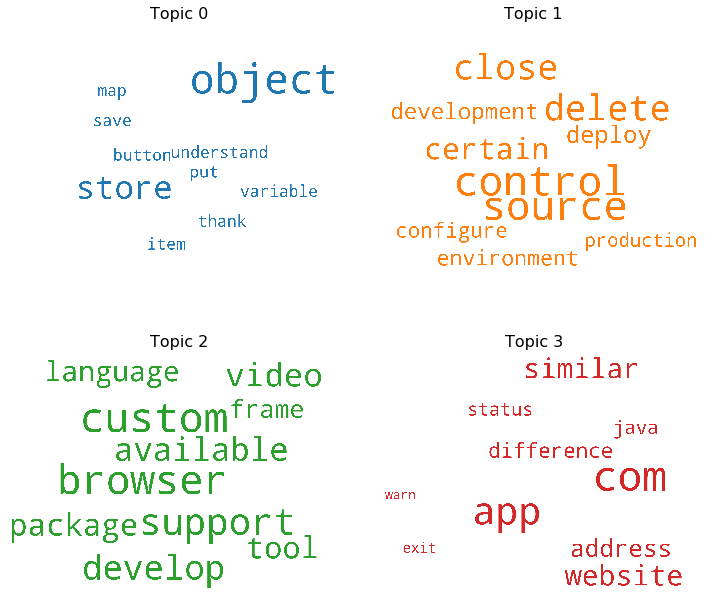

In [148]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Lets work on Remaining/Bigger Data 

In [66]:
unseen_data2 =  df_question[df_question['Score'] < 5]

In [100]:
unseen_data2.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
44,3790,560.0,2008-08-06T18:15:43Z,NaN,3,Is there a WMI Redistributable Package?,<p>I've been working on a project that accesses the WMI to get information about the software in...
49,4320,1525924.0,2008-08-07T02:41:24Z,NaN,2,ASP.Net 2.0 Application without Business Logic Layer?,"<p>Is it ""acceptable"" to have an <strong>ASP.Net 2.0</strong> application without the BLL (Busin..."
60,5260,106.0,2008-08-07T20:21:52Z,NaN,4,What is the best way to wrap time around the work day?,<p>I have a situation where I want to add hours to a date and have the new date wrap around the ...
61,5460,590.0,2008-08-07T23:00:30Z,2012-11-16T12:21:26Z,3,Telligent's Community Server,<p>The company I work for is wanting to add blog functionality to our website and they were look...
63,5690,364.0,2008-08-08T05:03:42Z,NaN,2,MVC Preview 4 - No route in the route table matches the supplied values,<p>I have a route that I am calling through a RedirectToRoute like this:</p>\n\n<pre><code>retur...


In [79]:
unseen_data = pd.DataFrame()

In [105]:
unseen_data = unseen_data2.iloc[0:250000,]
               

pandas.core.frame.DataFrame

In [111]:
unseen_data['body_cleaned'] = unseen_data['Body'].apply(normalize_text)

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
unseen_data['body_cleaned'] = unseen_data['body_cleaned'].apply(lambda x: cleanup_text(x, False))

C:\Users\patha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
 >>> # Save model to disk.
>>> temp_file = datapath("/content/gdrive/My Drive/kaggle/StackOverflow/")
>>> lda.save(temp_file)
>>>
>>> # Load a potentially pretrained model from disk.
# >>> lda = LdaModel.load(temp_file)

In [0]:
!pwd

/content/gdrive/My Drive/kaggle/StackOverflow


In [0]:
import pickle
lda_Filename = "Pickle_RL_Model.pkl"  

with open(lda_Filename, 'wb') as file:  
    pickle.dump(lda_model, file)

In [0]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords.words('english') and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)

unseen_data['body_cleaned'] = unseen_data['body_cleaned'].apply(lambda x: cleanup_text(x, False))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [113]:
unseen_data.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_cleaned
44,3790,560.0,2008-08-06T18:15:43Z,NaN,3,Is there a WMI Redistributable Package?,<p>I've been working on a project that accesses the WMI to get information about the software in...,work project access wmi get information software instal user 's machine . query win32_product fi...
49,4320,1525924.0,2008-08-07T02:41:24Z,NaN,2,ASP.Net 2.0 Application without Business Logic Layer?,"<p>Is it ""acceptable"" to have an <strong>ASP.Net 2.0</strong> application without the BLL (Busin...",acceptable asp.net 2.0 application without bll business logic layer following?sql server data st...
60,5260,106.0,2008-08-07T20:21:52Z,NaN,4,What is the best way to wrap time around the work day?,<p>I have a situation where I want to add hours to a date and have the new date wrap around the ...,situation want add hour date new date wrap around work day . cobble function determine new date ...
61,5460,590.0,2008-08-07T23:00:30Z,2012-11-16T12:21:26Z,3,Telligent's Community Server,<p>The company I work for is wanting to add blog functionality to our website and they were look...,company work want add blog functionality website look spend awful amount money crap build top cm...
63,5690,364.0,2008-08-08T05:03:42Z,NaN,2,MVC Preview 4 - No route in the route table matches the supplied values,<p>I have a route that I am calling through a RedirectToRoute like this:</p>\n\n<pre><code>retur...,route call redirecttoroute like also try route global.asax like get error route route table matc...


In [114]:
unseen_data.drop(['Id','OwnerUserId' ,'ClosedDate' ,'CreationDate' , 'Title' ,'Body' ,] , axis=1 , inplace=True)

c:\py3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
unseen_data.head(2)

,Score,body_cleaned
44,3,work project access wmi get information software instal user 's machine . query win32_product fi...
49,2,acceptable asp.net 2.0 application without bll business logic layer following?sql server data st...


In [116]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations



In [117]:
unseendata_words = list(sent_to_words(unseen_data['body_cleaned']))

print(unseen_data[:5])

    Score  \
44      3   
49      2   
60      4   
61      3   
63      2   

                                                                                           body_cleaned  
44  work project access wmi get information software instal user 's machine . query win32_product fi...  
49  acceptable asp.net 2.0 application without bll business logic layer following?sql server data st...  
60  situation want add hour date new date wrap around work day . cobble function determine new date ...  
61  company work want add blog functionality website look spend awful amount money crap build top cm...  
63  route call redirecttoroute like also try route global.asax like get error route route table matc...  


In [118]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(unseendata_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[unseendata_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[unseendata_words[0]]])

['work', 'project', 'access', 'wmi', 'get', 'information', 'software', 'instal', 'user', 'machine', 'query', 'win', 'find', 'exist', 'bit', 'version', 'windows', 'optional', 'component', 'know', 'lot', 'really', 'good', 'alternative', 'query', 'wmi', 'information', 'get', 'bit', 'vested', 'interest', 'find', 'well', 'go', 'work', 'want', 'know', 'kind', 'redistributable_package', 'software', 'allow', 'bit', 'user', 'get', 'wmi', 'installer', 'provider', 'put', 'onto', 'machine', 'right', 'install', 'manually', 'installation', 'require', 'windows', 'disc', 'handy', 'edit', 'mention', 'os', 'wmi', 'redistributable', 'components', 'version', 'definitely', 'exist', 'operation', 'system', 'use', 'net', 'need', 'package', 'work', 'xp', 'bit', 'version', 'windows_vista']


In [119]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [120]:
data_words_nostops_unseen = remove_stopwords(unseendata_words)

# Form Bigrams
data_words_bigrams_unseen = make_bigrams(data_words_nostops_unseen)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_unseen = lemmatization(data_words_bigrams_unseen, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized_unseen[:1])

[['project', 'information', 'software', 'instal', 'user', 'machine', 'exist', 'bit', 'version', 'window', 'optional', 'component', 'really', 'good', 'alternative', 'bit', 'vest', 'interest', 'kind', 'redistributable_package', 'software', 'allow', 'bit', 'provider', 'put', 'machine', 'right', 'install', 'manually', 'installation', 'require', 'mention', 'version', 'definitely', 'exist', 'operation', 'system', 'net', 'package', 'version', 'window']]


In [121]:
other_corpus = [id2word.doc2bow(text) for text in data_lemmatized_unseen]

In [122]:
unseen_doc = other_corpus[0]

In [124]:
vector = lda_model[unseen_doc]

In [127]:
lda_model.update(other_corpus)
vector = lda_model[unseen_doc]

In [130]:
unseen_doc[0][1]

2

In [139]:
print(unseen_doc)

[(4, 2), (17, 1), (19, 1), (36, 1), (38, 1), (40, 1), (81, 1), (136, 3), (171, 1), (186, 3), (187, 2), (222, 1), (227, 2), (275, 1), (286, 1), (356, 1), (418, 2), (489, 1), (515, 1), (604, 1), (663, 1), (682, 1), (820, 1), (854, 1), (874, 1), (1090, 1), (1203, 1), (1238, 1), (1307, 1), (2442, 1), (2822, 1), (47010, 1)]


In [142]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=other_corpus, texts=data_lemmatized_unseen)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,19.0,0.2881,"user, create, page, follow, add, application, server, new, possible, update","[project, information, software, instal, user, machine, exist, bit, version, window, optional, c..."
1,1,19.0,0.2084,"user, create, page, follow, add, application, server, new, possible, update","[acceptable, application, business_logic, layer, follow, server, datum, storage, amp, store, pro..."
2,2,18.0,0.2492,"help, time, could, question, list, seem, give, return, think, different","[situation, add, hour, date, new, date, wrap, day, cobble, function, determine, new, date, sure,..."
3,3,18.0,0.3219,"help, time, could, question, list, seem, give, return, think, different","[company, add, blog, functionality, website, spend, awful, amount, money, crap, build, top, cms,..."
4,4,18.0,0.2551,"help, time, could, question, list, seem, give, return, think, different","[route, route, table, match, supply, value, type, selectedyear, var, convert, int, parse, realis..."
5,5,18.0,0.1993,"help, time, could, question, list, seem, give, return, think, different","[hand, table, row, record, describe, location, customer, issue, person, create, table, add, fiel..."
6,6,2.0,0.1769,"problem, value, first, write, line, number, read, check, solution, idea","[net, system, build, automate, mail, notification, editable, sql, table, edit, queue, idea, thro..."
7,7,18.0,0.2296,"help, time, could, question, list, seem, give, return, think, different","[suddenly, back, winform, year, web, development, trouble, simple, arraylist, business, object, ..."
8,8,19.0,0.2309,"user, create, page, follow, add, application, server, new, possible, update","[good, animation, net, prefer, flash, possible, suggestion, implement, different, type, animatio..."
9,9,19.0,0.2094,"user, create, page, follow, add, application, server, new, possible, update","[couple, hour, fight, gallery, message, feed, yet, define, give, base, search, feed, yet, define..."


In [144]:
df_dominant_topic["Dominant_Topic"].value_counts()

19.0    119764
18.0     81115
2.0      41404
9.0       1733
5.0       1338
14.0      1067
4.0        734
7.0        645
16.0       443
10.0       303
3.0        293
12.0       292
17.0       284
0.0        123
8.0        115
15.0        98
13.0        83
1.0         82
6.0         48
11.0        36
Name: Dominant_Topic, dtype: int64